# Exploratory Data Analysis

### ***This case study consists of analyzing the behaviour of people who go to a restaurant and leave tips.*** 

### Questions:

### <font color=red> - Does the total bill value influence the tip amount? </font>

###     <font color=red> - Does the dessert influence the tip amount? </font>

###  <font color=red> - Does the day of the week influence the tip amount? </font>

###     <font color=red> - Does the time (lunch or dinner) influence the tip amount? </font>

### Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import ranksums

### importing DataBase

In [2]:
database = pd.read_csv('data/tips.csv', sep = ',')

In [3]:
database

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [4]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   dessert     244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


# Analysis report I - Total bill vs Tip

> ### <font color=red> - Does the total bill value influence the tip amount? </font>

In [5]:
database.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

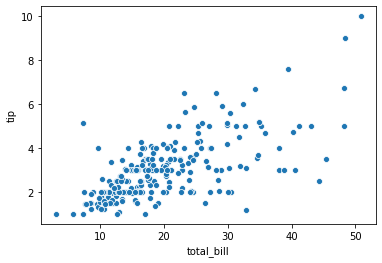

In [6]:
tip_amount = sns.scatterplot(x='total_bill', y='tip', data=database)

Apparently, the tip amount increases as the total of the bill also increase.

### <font color=red> But is the tip amount proportional to the total amount spent? </font>

In [7]:
database['percentage'] = (database['tip'] / database['total_bill']).round(2)

In [8]:
database

,total_bill,tip,dessert,day,time,size,percentage
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17
3,23.68,3.31,No,Sun,Dinner,2,0.14
4,24.59,3.61,No,Sun,Dinner,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.20
240,27.18,2.00,Yes,Sat,Dinner,2,0.07
241,22.67,2.00,Yes,Sat,Dinner,2,0.09
242,17.82,1.75,No,Sat,Dinner,2,0.10


Text(0.5, 0.98, 'Total bill vs Tip')

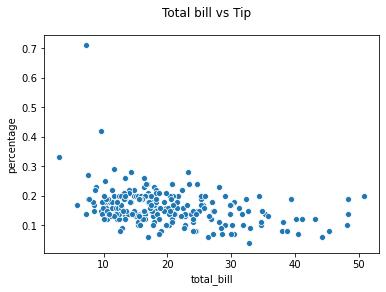

In [9]:
percentage = sns.scatterplot(x='total_bill', y='percentage', data=database)
percentage.figure.suptitle('Total bill vs Tip')

In [10]:
percentage_chart = percentage.get_figure()

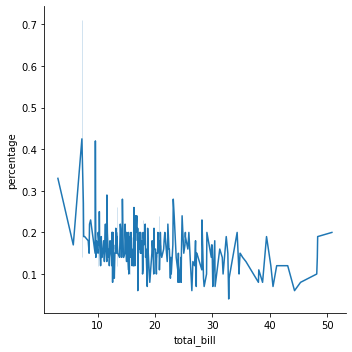

In [11]:
percentage = sns.relplot(x='total_bill', y='percentage', kind='line', data=database)

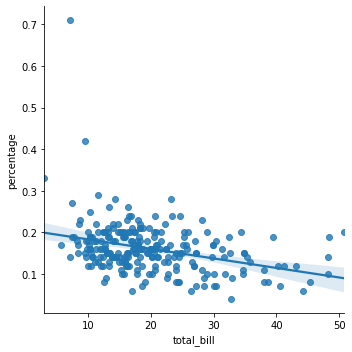

In [12]:
percentage = sns.lmplot(x='total_bill', y='percentage', data=database)

According to the graphics above, apparently, there was been a decrement in the amount paid as a tip in relation to the total amount of the bill, so the tip amount is not proportional to the total amount spent.

# Analysis Report II - Dessert vs Tip

> ###  <font color=red> - Does the dessert influence the tip amount? </font>

In [13]:
database[database['dessert'] == 'Yes'].describe().round(2)

,total_bill,tip,size,percentage
count,93.00,93.00,93.00,93.00
mean,20.76,3.01,2.41,0.16
std,9.83,1.40,0.81,0.09
min,3.07,1.00,1.00,0.04
25%,13.42,2.00,2.00,0.11
50%,17.92,3.00,2.00,0.15
75%,26.86,3.68,3.00,0.20
max,50.81,10.00,5.00,0.71


In [14]:
database[database['dessert'] == 'No'].describe().round(2)

,total_bill,tip,size,percentage
count,151.00,151.00,151.00,151.00
mean,19.19,2.99,2.67,0.16
std,8.26,1.38,1.02,0.04
min,7.25,1.00,1.00,0.06
25%,13.32,2.00,2.00,0.14
50%,17.59,2.74,2.00,0.16
75%,22.76,3.50,3.00,0.18
max,48.33,9.00,6.00,0.29


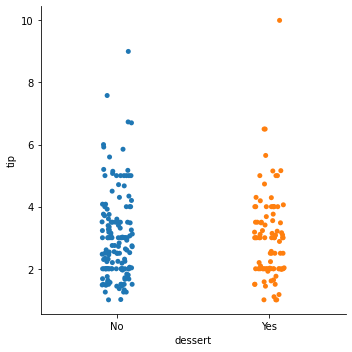

In [15]:
chart = sns.catplot(x='dessert', y='tip', data=database)

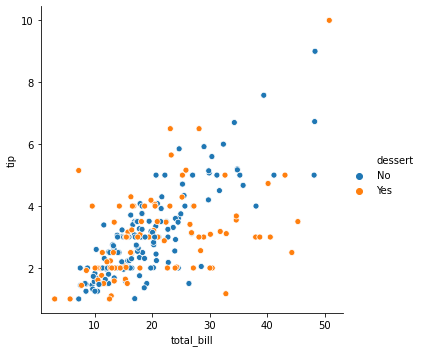

In [16]:
chart = sns.relplot(x='total_bill', y='tip', hue='dessert', data=database)

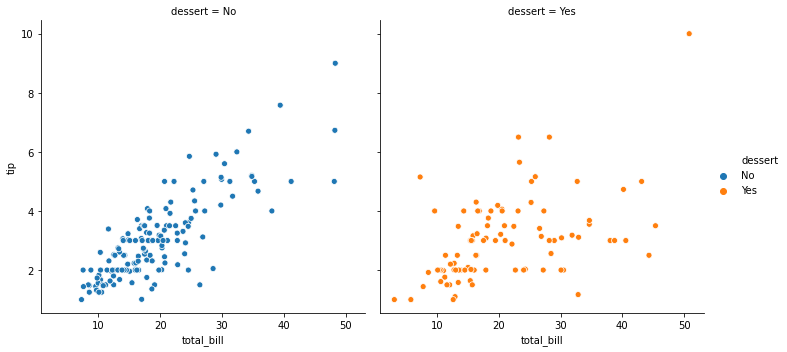

In [17]:
chart = sns.relplot(x='total_bill', y='tip', hue='dessert', col='dessert', data=database)

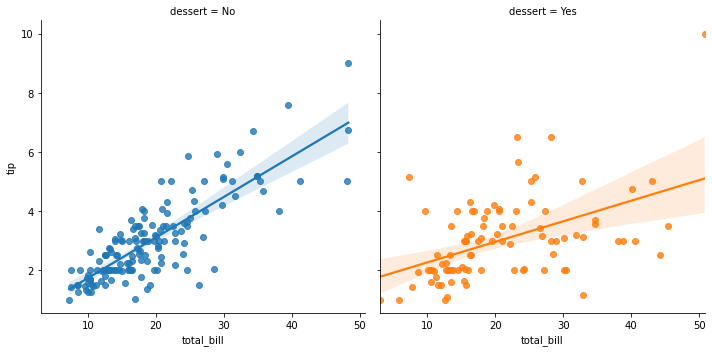

In [18]:
chart = sns.lmplot(x='total_bill', y='tip', hue='dessert', col='dessert', data=database)

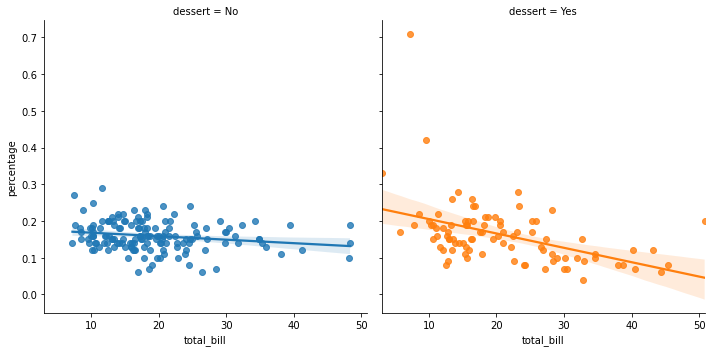

In [19]:
chart = sns.lmplot(x='total_bill', y='percentage', hue='dessert', col='dessert', data=database)

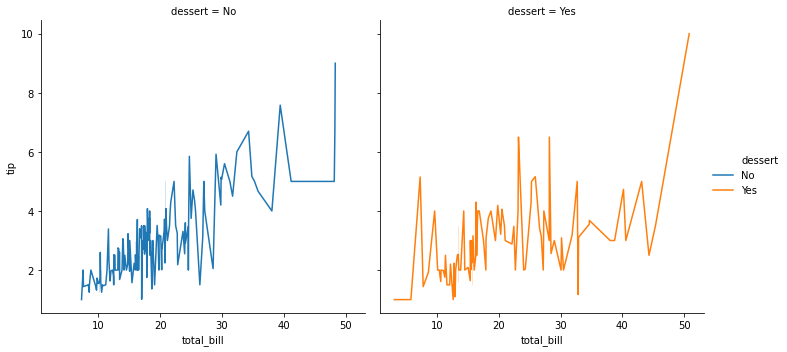

In [20]:
chart = sns.relplot(x='total_bill', y='tip', hue='dessert', col='dessert', kind='line', data=database)

Apparently, there is a difference in the tip amount (although very subtle), between those who order dessert and those who do not. It is possible to see that those who order dessert are more likely to leave tip.

## Hypothesis testing I

**H<sup>null</sup>

> Meaning: The <u>tip</u> distribution is the same for both groups.

**H<sup>alt</sup>

> Meaning: The <u>tip</u> distribution is not the same for both groups.

In [21]:
dessert = database.query("dessert == 'Yes'").percentage
no_dessert = database.query("dessert == 'No'").percentage
result = ranksums(dessert, no_dessert)
print(f'The value of [p-value] is {result.pvalue:.4f}.')

The value of [p-value] is 0.5267.


**<u>*p-value - represents the probability that that sample happened within a group. If the chance is small, usually p-value <0.05, it represents that a very rare event happened, then we chose to discard the null hypothesis, and say that it may not be true.**</u>

## Completing the hypothesis testing

**H<sup>null</sup>

> The tip distribution is the same for both groups since the value of the [p-value] is 0.5267. Therefore, the alternative hypothesis was disregarded.

# Analysis report III - Weekdays vs Tip

> ###  <font color=red> - Does the day of the week influence the tip amount? </font>

In [22]:
database['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

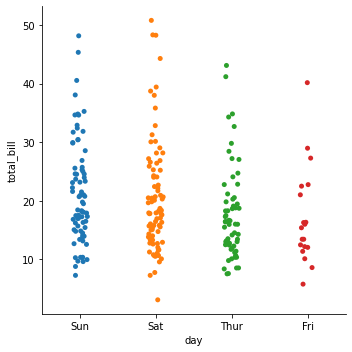

In [23]:
weekdays = sns.catplot(x='day', y='total_bill', data=database)

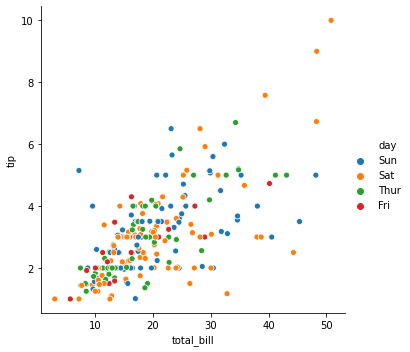

In [24]:
weekdays = sns.relplot(x='total_bill', y='tip', hue='day', data=database)

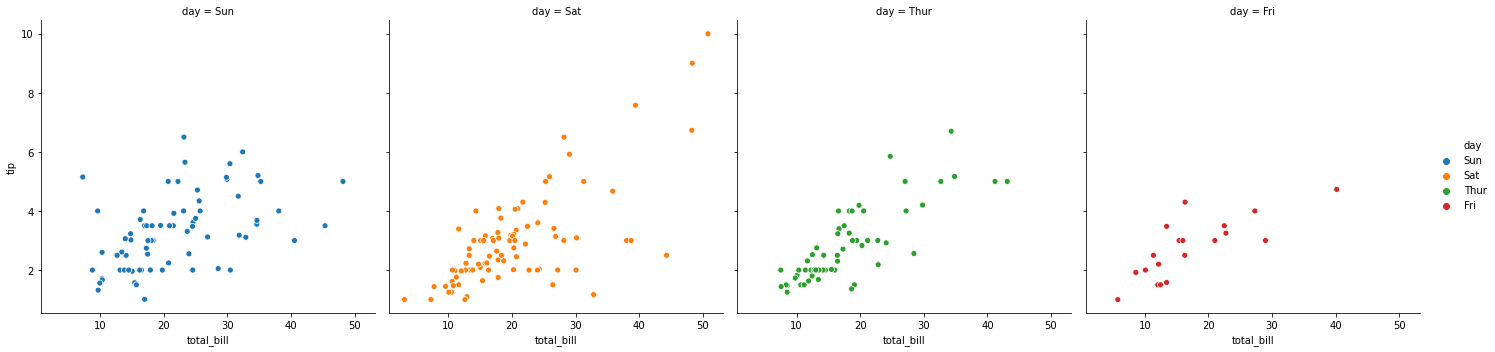

In [25]:
weekdays = sns.relplot(x='total_bill', y='tip', hue='day', col='day', data=database)

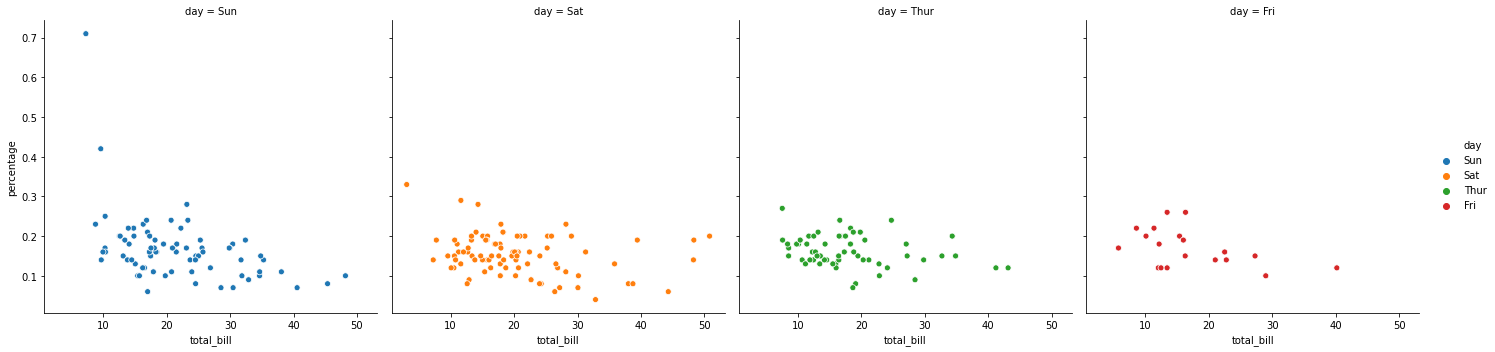

In [26]:
weekdays = sns.relplot(x='total_bill', y='percentage', hue='day', col='day', data=database)

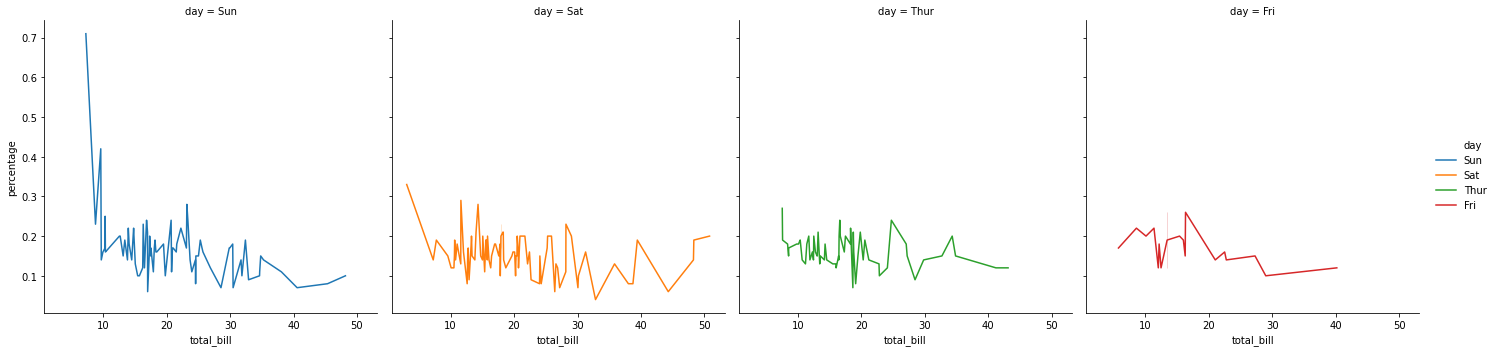

In [27]:
weekdays = sns.relplot(x='total_bill', y='percentage', hue='day', col='day', kind='line', data=database)

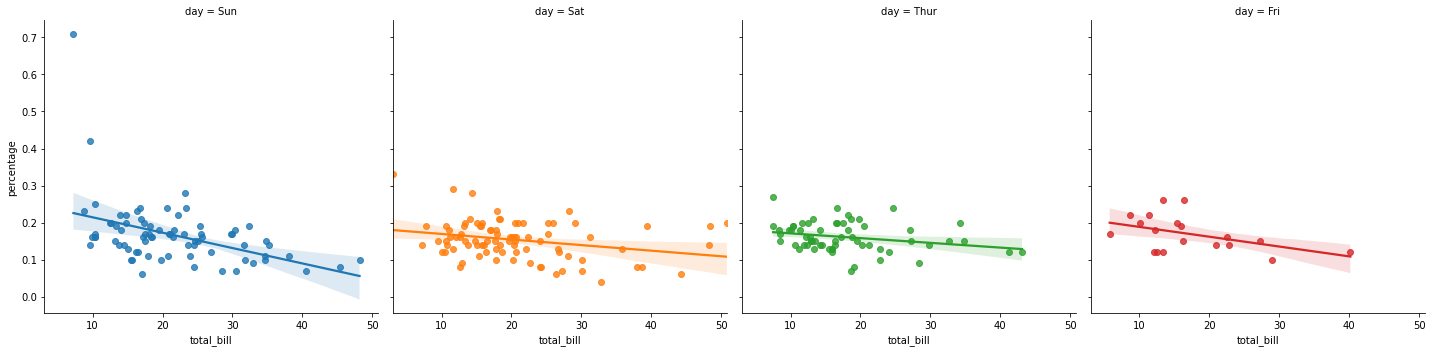

In [28]:
weekdays = sns.lmplot(x='total_bill', y='percentage', hue='day', col='day', data=database)

In [29]:
overall_tip_aver = database['tip'].mean()

In [30]:
print(f'The overall tip average is ${overall_tip_aver:.2f}.')

The overall tip average is $3.00.


In [31]:
database.groupby(['day']).mean()[['total_bill', 'tip', 'percentage']]

,total_bill,tip,percentage
day,,,
Fri,17.151579,2.734737,0.169474
Sat,20.441379,2.993103,0.153678
Sun,21.410000,3.255132,0.166974
Thur,17.682742,2.771452,0.161129


In [32]:
print('Frequency of weekdays:')
database['day'].value_counts()

Frequency of weekdays:


Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

## Hypothesis testing II

**H<sup>null</sup>

> Meaning: The <u>total bill</u> distribution is the same both on **Saturday** and **Sunday**.

**H<sup>alt</sup>

> Meaning: The <u>total bill</u> distribution is not the same both on **Saturday** and **Sunday**.

In [33]:
total_bill_sun = database.query("day == 'Sun'").total_bill
total_bill_sat = database.query("day == 'Sat'").total_bill
result = ranksums(total_bill_sun, total_bill_sat)
print(f'The value of [p-value] is {result.pvalue:.4f}.')

The value of [p-value] is 0.3577.


## Completing the hypothesis testing

**H<sup>null</sup>

> The total bill distribution is the same both on **Saturday** and **Sunday** since the value of the [p-value] is 0.3577. Therefore, the alternative hypothesis was disregarded.

# Analysis report IV - Time vs Tip

> ### <font color=red> - Does the time (lunch or dinner) influence the tip amount? </font>

In [34]:
database.head(10)

,total_bill,tip,dessert,day,time,size,percentage
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17
3,23.68,3.31,No,Sun,Dinner,2,0.14
4,24.59,3.61,No,Sun,Dinner,4,0.15
5,25.29,4.71,No,Sun,Dinner,4,0.19
6,8.77,2.00,No,Sun,Dinner,2,0.23
7,26.88,3.12,No,Sun,Dinner,4,0.12
8,15.04,1.96,No,Sun,Dinner,2,0.13
9,14.78,3.23,No,Sun,Dinner,2,0.22


In [35]:
database['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

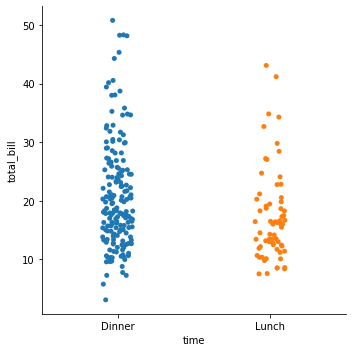

In [36]:
time = sns.catplot(x='time', y='total_bill', data=database)

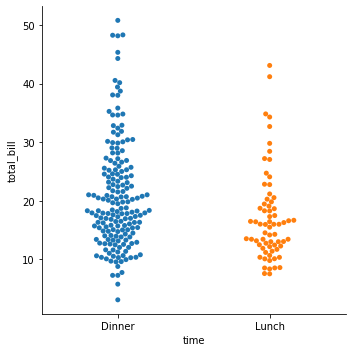

In [37]:
time = sns.catplot(x='time', y='total_bill', kind='swarm' , data=database)

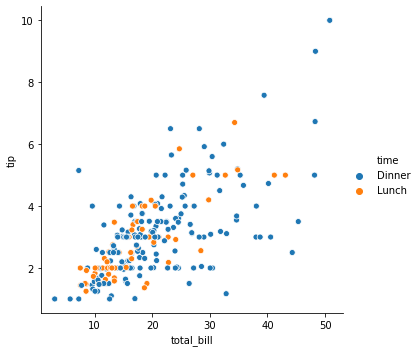

In [38]:
time = sns.relplot(x='total_bill', y='tip', hue='time', data=database)

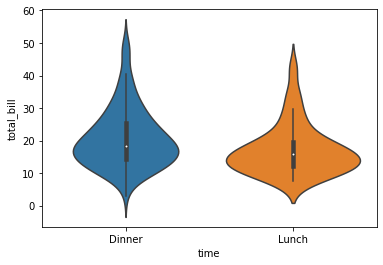

In [39]:
time = sns.violinplot(x='time', y='total_bill', data=database)

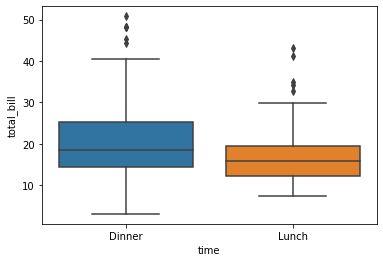

In [40]:
time = sns.boxplot(x='time', y='total_bill', data=database)

In [41]:
lunch = database.query("time == 'Lunch'").total_bill

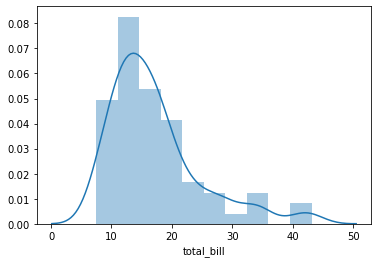

In [42]:
time = sns.distplot(lunch)

In [43]:
dinner = database.query("time == 'Dinner'").total_bill

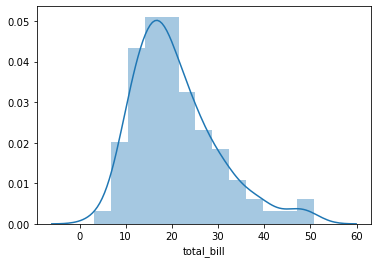

In [44]:
time = sns.distplot(dinner)

In [45]:
database.groupby(['time']).mean()[['total_bill', 'tip','percentage']]

,total_bill,tip,percentage
time,,,
Dinner,20.797159,3.102670,0.159773
Lunch,17.168676,2.728088,0.163971


## Hypothesis testing III

**H<sup>null</sup>

> Meaning: The <u>total bill</u> distribution is the same both on **Lunch** and **Dinner**.

**H<sup>alt</sup>

> Meaning: The <u>total bill</u> distribution is not the same both on **Lunch** and **Dinner**.

In [46]:
result = ranksums(lunch, dinner)
print(f'The value of [p-value] is {result.pvalue:.4f}.')

The value of [p-value] is 0.0012.


## Completing the hypothesis testing

**H<sup>alt</sup>

> Since the value of the [p-value] is 0.0012, the alternative hypothesis will be regarded.
> The total bill distribution **<u>is not the same</u>** both on Lunch and Dinner.

## Hypothesis testing IV

**H<sup>null</sup>

> Meaning: The <u>tip</u> distribution is the same both on **Lunch** and **Dinner**.

**H<sup>alt</sup>

> Meaning: The <u>tip</u> distribution is not the same both on **Lunch** and **Dinner**.

In [47]:
percentage_lunch = database.query("time == 'Lunch'").percentage
percentage_dinner = database.query("time == 'Dinner'").percentage
result = ranksums(percentage_lunch, percentage_dinner)
print(f'The value of [p-value] is {result.pvalue:.4f}.')

The value of [p-value] is 0.2602.


**H<sup>null</sup>

> Since the value of the [p-value] is 0.2602, the tip distribution can be considered the same for both on **Saturday** and **Sunday**. Therefore, the alternative hypothesis was disregarded.

# Conclusion

> According to the data analysed during this study, where hour hypotheses were tested, of which only in one was found difference between the evaluated criteria, it could be noted that the power to decide whether to tip or not is not related to the criteria raised such as dessert or weekdays or yet lunch or dinner.